In [9]:
import yfinance as yf
import metrics.fundamental_analysis as fa
import pandas as pd
import numpy as np
import importlib
from dataclasses import dataclass, asdict
from pprint import pprint
import sklearn
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
# S&P 500 tickers
sp500_tickers = np.array(pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0].loc[:, 'Symbol'].tolist())
# nasdaq_composite = np.array(pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0].loc[:, 'Symbol'].tolist())
print(len(sp500_tickers))

In [ ]:
t1 = yf.Ticker(sp500_tickers[0])
print(t1.financials.loc['Net Income'])
print(t1.balance_sheet.loc['Total Assets'])
print((t1.financials.loc['Net Income'] / t1.balance_sheet.loc['Total Assets']).tolist())
print(t1.financials.loc['Net Income'].tolist())
print(t1.balance_sheet.loc['Total Assets'].tolist())


In [5]:
sp500_tickers = pd.read_csv('stocks-list.csv')['Symbol'].tolist()

In [6]:

metrics = []
for sptick in sp500_tickers:
    try:
        metrics.append(fa.get_fundamental_analysis_metrics(sptick))
    except Exception as e:
        print(e)
        print(f'Failed to get metrics for {sptick}')
        continue
sp500df = pd.DataFrame.from_records([asdict(s) for s in metrics])
sp500df.head()
sp500df.to_csv('sp500-expanded.csv')

wrong value type for field "price_earnings_ratio" - should be "float" instead of value "Infinity" of type "str"
Failed to get metrics for AACT
wrong value type for field "price_earnings_ratio" - should be "float" instead of value "Infinity" of type "str"
Failed to get metrics for ADEX
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v6/finance/quoteSummary/AGM.A?modules=financialData&modules=quoteType&modules=defaultKeyStatistics&modules=assetProfile&modules=summaryDetail&ssl=true
Failed to get metrics for AGM.A
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v6/finance/quoteSummary/AKO.A?modules=financialData&modules=quoteType&modules=defaultKeyStatistics&modules=assetProfile&modules=summaryDetail&ssl=true
Failed to get metrics for AKO.A
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v6/finance/quoteSummary/AKO.B?modules=financialData&modules=quoteType&modules=defaultKeyStatistics&modules=assetProfile&modules=summaryDet

In [ ]:
for y_delta in range(4):
    roi = 'return_on_investments_y' + str(y_delta + 1)
    related_metrics = [roi, 'return_on_assets_y' + str(y_delta + 1), 'return_on_equity_y' + str(y_delta + 1)]
    related_metrics_corr_df = sp500df[related_metrics].corr()
    num_related = len(related_metrics) - 1
    # tested in cli, works
    sp500df.loc[sp500df[roi] == -1, roi] = sum([related_metrics_corr_df.loc[roi, m] * sp500df.loc[sp500df[roi] == -1, m] for m in related_metrics[1:]]) / num_related

sp500df.to_csv('s_and_p500df.csv')

In [ ]:
num_columns = len(sp500df.columns)
clean_df = sp500df[sp500df[sp500df == -1].count(axis=1) < num_columns / 4].reset_index()
clean_df.to_csv('clean_sp500.csv')
very_clean_df = sp500df[sp500df[sp500df == -1].count(axis=1) == 0].reset_index()
very_clean_df.to_csv('very_clean_sp500.csv')

In [ ]:
aapl  = yf.Ticker('AAPL')
mmm = yf.Ticker('MMM')
amzn = yf.Ticker('AMZN')
print("========AAPL========")
aapl_keys = list(aapl.balance_sheet['2022-09-30'].keys())

In [ ]:
print("========MMM========")
mmm_keys = mmm.balance_sheet['2022-12-31'].keys().tolist()
print(len(mmm_keys))

In [ ]:

print("======AMZN======")
amzn_keys = list(amzn.balance_sheet['2022-12-31'].keys())
print(len(amzn_keys))

In [ ]:
set(mmm_keys) & set(amzn_keys) & set(aapl_keys)

In [ ]:
bal_keys = []
for ticker in sp500_tickers[:100]:
    tick = yf.Ticker(ticker)
    try:
        current_balance_sheet = tick.balance_sheet[tick.balance_sheet.keys()[0]].keys()
    except Exception as e:
        continue
    if len(bal_keys) == 0:
        bal_keys = current_balance_sheet
    else:
        bal_keys = list(set(bal_keys) & set(current_balance_sheet))
pprint(bal_keys)
# See common keys inside list of lists bal_keys


In [ ]:
financials_keys = []
for ticker in sp500_tickers[:100]:
    tick = yf.Ticker(ticker)
    try:
        current_financial = tick.financials[tick.financials.keys()[0]].keys()
    except Exception as e:
        continue
    if len(financials_keys) == 0:
        financials_keys = current_financial
    else:
        financials_keys = list(set(financials_keys) & set(current_financial))
pprint(financials_keys)
# See common keys inside list of lists bal_keys

In [ ]:
income_stmt_keys = []
for ticker in sp500_tickers[:100]:
    tick = yf.Ticker(ticker)
    try:
        current_income_stmt = tick.income_stmt[tick.income_stmt.keys()[0]].keys()
    except Exception as e:
        continue
    if len(financials_keys) == 0:
        income_stmt_keys = current_income_stmt
    else:
        income_stmt_keys = list(set(income_stmt_keys) & set(current_income_stmt))
pprint(financials_keys)
# See common keys inside list of lists bal_keys

# Data Cleaning

In [9]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv('sp500-expanded.csv')

,Unnamed: 0,ticker,activity_domain,market_cap,net_revenue_y1,net_revenue_y2,net_revenue_y3,net_revenue_y4,net_income_y1,net_income_y2,...,return_on_assets_y1,return_on_assets_y2,return_on_assets_y3,return_on_assets_y4,return_on_investments_y1,return_on_investments_y2,return_on_investments_y3,return_on_investments_y4,price_to_earnings_growth,price_to_book_ratio
0,0,A,Healthcare,37113995264,6.848000e+09,6.319000e+09,5.339000e+09,5.163000e+09,1.254000e+09,1.210000e+09,...,0.119247,0.113031,0.074686,0.113309,6.430769,6.540541,4.550633,10.500000,2.11,6.417590
1,1,AA,Basic Materials,5412686336,1.245100e+10,1.215200e+10,9.286000e+09,1.043300e+10,-1.020000e+08,4.290000e+08,...,-0.006900,0.028594,-0.011437,-0.076844,-0.089239,0.357798,-0.161751,-1.010782,-3.31,1.118154
2,2,AAC,Financial Services,766769152,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,2.098359e+07,1.584907e+07,...,-1.000000,0.015824,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00,-1.000000
3,3,AACG,Consumer Defensive,37271360,2.068209e+08,2.022095e+08,1.621675e+08,9.777017e+07,-4.789291e+07,-3.364959e+07,...,-0.100941,-0.066347,-0.160171,-0.182961,-1.260340,-0.885516,-2.095410,-2.671420,-0.06,0.294411
4,4,AACI,Financial Services,98175424,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-3.622794e+06,-1.000000e+00,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00,-1.000000


In [ ]:
#df.isna().sum()
count_minus_ones = df.apply(lambda col: (col == -1).sum())

# Create a new DataFrame with the count of -1 values for each column
count_df = pd.DataFrame({'Column': count_minus_ones.index, 'Count of -1': count_minus_ones.values})
count_df


## Activity Domain

In [13]:
df['activity_domain'].value_counts()

activity_domain
Healthcare                1259
Financial Services        1105
Technology                 777
Industrials                642
Consumer Cyclical          573
Communication Services     267
Real Estate                264
Basic Materials            259
Energy                     256
Consumer Defensive         242
Utilities                  107
Name: count, dtype: int64

In [ ]:
print("Missing values:" + str(df['activity_domain'].isna().sum()))
print(df['ticker'].loc[df['activity_domain'].isna()])

### Activity domain is na for:

Berkeley Class B - should be "Financial Services" (Is there another BRK already?)

Brown-Forman Corporation Class B - should be "Consumer Cyclical" (Is there another BF already?)
 
Caterpillar Inc. - should be "Industrials"

In [ ]:
df.at[64, 'activity_domain'] = "Financial Services"
df.at[80, 'activity_domain'] = "Consumer Cyclical"
df.at[92, 'activity_domain'] = "Industrials"

In [ ]:
one_hot = pd.get_dummies(df['activity_domain'], prefix='activity_domain')
df = df.drop('activity_domain', axis=1)
df = pd.concat([df, one_hot], axis=1)

In [ ]:
columns_to_convert = [col for col in df.columns if 'activity_domain' in col]
for column in columns_to_convert:
    df[column] = df[column].astype(int)

# Market Cap

In [ ]:
print('Missing values: ' + str(df['market_cap'].loc[df['market_cap'] == -1].count()))

# Net Revenue

In [ ]:
# IGNORE

# Net Income

In [ ]:
print('Missing values: ' + str(df['net_income'].isna().sum()))

# P/E

In [16]:
print('Missing values: ' + str(df['price_earnings_ratio'].loc[df['price_earnings_ratio'] == -1].count()))

Missing values: 2736


In [ ]:
df = pd.read_csv('s_and_p500metrics.csv')
roe = []

def get_roe(ticker: yf.Ticker) -> float:
    metrics = {}
    fa.check_metric_exists_and_fill_out(ticker, metrics, 'return_on_equity', 
        lambda: (ticker.financials.loc['Net Income'] / ticker.balance_sheet.loc['Stockholders Equity']).tolist() + [ticker.info['returnOnEquity']], [-1])

    return metrics['return_on_equity']


for index, row in df.iterrows():
    print(index)
    ticker = yf.Ticker(row['ticker'])
    roe.append(get_roe(ticker))
df['return_on_equity'] = roe
df.to_csv('s_and_p500_v2.csv')

In [ ]:
import yfinance as yf

ticker = yf.Ticker("AAPL")
balance_sheet = ticker.balance_sheet

In [ ]:
balance_sheet['2022-09-30'].keys()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

df = df.drop(columns=['return_on_investments_y1', 'return_on_investments_y2', 'return_on_investments_y3', 'return_on_investments_y4'])
df = df[~(df == -1).any(axis=1)]

In [ ]:
corr_matrix = df.drop(['ticker', 'Unnamed: 0'], axis=1).corr()
sn.heatmap(corr_matrix, annot=True)

# Very Clean

In [2]:
df = pd.read_csv('very_clean_sp500.csv')
df = df.drop(['ticker', 'Unnamed: 0', 'index'], axis=1)
df.head()

,activity_domain,market_cap,net_revenue_y1,net_revenue_y2,net_revenue_y3,net_revenue_y4,net_income_y1,net_income_y2,net_income_y3,net_income_y4,...,return_on_assets_y1,return_on_assets_y2,return_on_assets_y3,return_on_assets_y4,return_on_investments_y1,return_on_investments_y2,return_on_investments_y3,return_on_investments_y4,price_to_earnings_growth,price_to_book_ratio
0,Industrials,10830319616,3.753900e+09,3.538900e+09,2.895300e+09,2.992700e+09,2.357000e+08,4.871000e+08,3.449000e+08,3.700000e+08,...,0.070732,0.140197,0.109121,0.120994,0.002414,0.011643,0.002455,0.003905,2.56,5.737169
1,Healthcare,182137618432,4.365300e+10,4.307500e+10,3.460800e+10,3.190400e+10,6.933000e+09,7.071000e+09,4.495000e+09,3.687000e+09,...,0.093138,0.094034,0.061959,0.054311,9.050914,8.665441,5.475030,4.175538,-11.65,4.889366
2,Healthcare,267184095232,5.805400e+10,5.619700e+10,4.580400e+10,3.326600e+10,1.183600e+10,1.154200e+10,4.616000e+09,7.882000e+09,...,0.085271,0.078769,0.030658,0.088448,49.112033,41.667870,15.754266,84.752688,-3.30,20.773663
3,Technology,195962765312,6.159430e+10,5.053339e+10,4.432704e+10,4.321501e+10,6.877169e+09,5.906809e+09,5.107839e+09,4.779112e+09,...,0.145507,0.136808,0.137757,0.160427,21.628222,17.925168,15.739965,19.887031,3.11,7.729525
4,Communication Services,71870652416,7.528000e+09,8.803000e+09,8.086000e+09,6.489000e+09,1.513000e+09,2.699000e+09,2.197000e+09,1.503000e+09,...,0.055253,0.107719,0.095071,0.075737,0.001773,0.008056,0.001975,0.002577,1.69,3.458556


In [3]:
df = df.dropna()

In [4]:
one_hot = pd.get_dummies(df['activity_domain'], prefix='activity_domain')
df = df.drop('activity_domain', axis=1)
df = pd.concat([df, one_hot], axis=1)
columns_to_convert = [col for col in df.columns if 'activity_domain' in col]
for column in columns_to_convert:
    df[column] = df[column].astype(int)
for column in df.columns:
    if column not in columns_to_convert:
        #df[column] = (df[column] - df[column].mean()) / df[column].std()
        df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

In [5]:
df.head()

,market_cap,net_revenue_y1,net_revenue_y2,net_revenue_y3,net_revenue_y4,net_income_y1,net_income_y2,net_income_y3,net_income_y4,earnings_per_share_y0,...,activity_domain_Communication Services,activity_domain_Consumer Cyclical,activity_domain_Consumer Defensive,activity_domain_Energy,activity_domain_Financial Services,activity_domain_Healthcare,activity_domain_Industrials,activity_domain_Real Estate,activity_domain_Technology,activity_domain_Utilities
0,0.002354,0.005914,0.006054,0.006793,0.010499,0.028849,0.069240,0.285343,0.160675,0.003235,...,0,0,0,0,0,0,1,0,0,0
1,0.063645,0.083650,0.090330,0.088995,0.113579,0.094172,0.134298,0.337316,0.211399,0.006738,...,0,0,0,0,0,1,0,0,0,0
2,0.094073,0.111708,0.118302,0.118016,0.118435,0.141995,0.178478,0.338831,0.275549,0.008716,...,0,0,0,0,0,1,0,0,0,0
3,0.068591,0.118605,0.106229,0.114188,0.153907,0.093628,0.122795,0.344991,0.228100,0.023056,...,0,0,0,0,0,0,0,0,1,0
4,0.024193,0.013267,0.017275,0.020248,0.022965,0.041307,0.091097,0.308537,0.178001,0.005584,...,1,0,0,0,0,0,0,0,0,0


# Autoencoder model training

In [6]:
from sklearn.model_selection import train_test_split


# Split the data into training and test sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [7]:
import torch.optim as optim
import torch
import torch.utils.data as data_utils
from ml_backend.autoencoders import Autoencoder

latent_dim = 10
model = Autoencoder(len(df.columns), latent_dim)

train_data = torch.tensor(train_df.values, dtype=torch.float32)
train_data = data_utils.TensorDataset(train_data, train_data)
loss = nn.MSELoss()
lr = 0.1
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-8)

model.train(data=train_data, loss_f=loss, optim=optimizer)

[torch.Size([25, 51]), torch.Size([12, 25]), torch.Size([10, 12])]
[torch.Size([12, 10]), torch.Size([25, 12]), torch.Size([51, 25])]
Epoch 0 loss: 0.09158399818111057
Epoch 1 loss: 0.060208282379572056
Epoch 2 loss: 0.04771576549334467
Epoch 3 loss: 0.03051566874439066
Epoch 4 loss: 0.029463510590890224
Epoch 5 loss: 0.028449790783164914
Epoch 6 loss: 0.028404643789918953
Epoch 7 loss: 0.028209830580417775
Epoch 8 loss: 0.0282123026337998
Epoch 9 loss: 0.028172898575786715
Epoch 10 loss: 0.028175068726716948
Epoch 11 loss: 0.028168232172481284
Epoch 12 loss: 0.028167600135418993
Epoch 13 loss: 0.0281689678095589
Epoch 14 loss: 0.02817009212372224
Epoch 15 loss: 0.028170225110428392
Epoch 16 loss: 0.02817143452130566
Epoch 17 loss: 0.02817241728983142
Epoch 18 loss: 0.02817339747220524
Epoch 19 loss: 0.028174374175588948
Epoch 20 loss: 0.02817535816022187
Epoch 21 loss: 0.02817615906684852
Epoch 22 loss: 0.028177128288864105
Epoch 23 loss: 0.028177940340574123
Epoch 24 loss: 0.02817881

i_size: 51, o_size: 34
i_size: 34, o_size: 22
i_size: 22, o_size: 15
i_size: 15, o_size: 10
i_size: 10, o_size: 6
i_size: 6, o_size: 4
i_size: 4, o_size: 2
i_size: 2, o_size: 1
[torch.Size([34, 51]), torch.Size([22, 34]), torch.Size([15, 22]), torch.Size([10, 15]), torch.Size([6, 10]), torch.Size([4, 6]), torch.Size([2, 4]), torch.Size([1, 2])]
[torch.Size([2, 1]), torch.Size([4, 2]), torch.Size([6, 4]), torch.Size([10, 6]), torch.Size([15, 10]), torch.Size([22, 15]), torch.Size([34, 22]), torch.Size([51, 34])]
Epoch 0 loss: 0.056126287745789066
Epoch 1 loss: 0.042392454887470926
Epoch 2 loss: 0.03432861249124216
Epoch 3 loss: 0.027995533687024076
Epoch 4 loss: 0.027825003197370482
Epoch 5 loss: 0.02766154688005605
Epoch 6 loss: 0.02705362372962404
Epoch 7 loss: 0.026502204104519086
Epoch 8 loss: 0.02631605749041581
Epoch 9 loss: 0.02626331832475406
Epoch 10 loss: 0.026219024592317827
Epoch 11 loss: 0.026217165764821464
Epoch 12 loss: 0.026208892941844364
Epoch 13 loss: 0.0262109840765

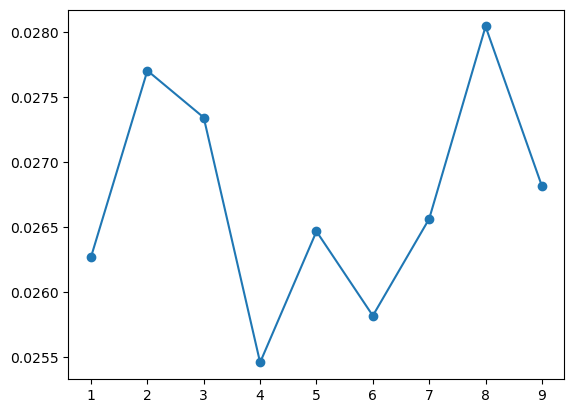

In [27]:
import ml_backend.autoencoders
importlib.reload(ml_backend.autoencoders)
from ml_backend.autoencoders import Autoencoder

training_losses = []
for latent_space_size in range(1, 10):
    model = Autoencoder(len(df.columns), latent_space_size, reduction=1.5)

    train_data = torch.tensor(train_df.values, dtype=torch.float32)
    train_data = data_utils.TensorDataset(train_data, train_data)
    loss = nn.MSELoss()
    lr = 0.1
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-8)

    model.train(data=train_data, loss_f=loss, optim=optimizer, n_epochs=500)
    training_losses.append(model.model_loss)

plt.plot(range(1, 10), training_losses, "-o", label="Training loss for latent space size hyperparameter")
plt.show()

In [23]:
df = df.dropna()

In [26]:
len(df.where(df['market_cap'] > 10000000))

4746